# Water Potability Prediction Project


## Column Descriptions

| Column Name        | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `ph`               | Measures the acidity or alkalinity of water.                               |
| `Hardness`         | The concentration of calcium and magnesium ions in water.                  |
| `Solids`           | Total dissolved solids in water (measured in ppm).                         |
| `Chloramines`      | Concentration of chlorine compounds used for water disinfection.            |
| `Sulfate`          | Amount of sulfate ions present in the water.                               |
| `Conductivity`     | Water's ability to conduct electricity, indicating ion concentration.       |
| `Organic_carbon`   | Amount of organic carbon, a measure of water contamination.                |
| `Trihalomethanes`  | Concentration of chemical compounds formed during chlorination.            |
| `Turbidity`        | Clarity of the water, measured by the scattering of light.                 |
| `Potability`       | Target variable indicating if water is potable (1) or non-potable (0).     |


## Import Necessary Library

In [501]:
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
 
import warnings
warnings.filterwarnings("ignore")

## Data Exploration and Preprocessing

## Loading the Dataset

The dataset is loaded into a pandas DataFrame using the `read_csv` method.

### Code Description:
- **`pd.read_csv("water_potability.csv")`**: This command reads the CSV file named `water_potability.csv` and converts it into a pandas DataFrame. 
- The dataset contains various water quality parameters and a target column, `Potability`, which indicates whether the water is safe for drinking (`1`) or not (`0`).

### Expected Outcome:
After executing this line, the variable `data` will hold the dataset, ready for further exploration and preprocessing.


In [502]:
data = pd.read_csv("water_potability.csv")

## Dataset Overview

### Code Description:
- **`data.info()`**: 
  - This command provides a concise summary of the dataset, including:
    - The number of rows and columns.
    - The data type of each column (e.g., `int`, `float`, `object`).
    - The number of non-null values in each column (useful for identifying missing values).

### Why Use `data.info()`?
- To understand the structure of the dataset.
- To identify potential issues, such as missing values or incorrect data types.

In [503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Checking for Missing Values

### Code Description:
- **`data.isnull().sum()`**:
  - This command checks for missing values in each column of the dataset.
  - It returns the total count of `NaN` (null) values for every column.
  - Helps in identifying columns that require imputation or further handling.

### Why Use `data.isnull().sum()`?
- To assess the extent of missing data in the dataset.
- To determine which columns need preprocessing for missing values.




In [504]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Statistical Summary of the Dataset

### Code Description:
- **`data.describe()`**:
  - This command generates descriptive statistics for all numeric columns in the dataset.
  - The statistics include:
    - **Count**: Number of non-null values.
    - **Mean**: Average of the column values.
    - **Std**: Standard deviation (measure of spread).
    - **Min** and **Max**: Minimum and maximum values in the column.
    - **25%**, **50% (Median)**, and **75%**: Quartiles of the column values.

### Why Use `data.describe()`?
- To understand the distribution of data.
- To identify potential outliers or anomalies by looking at minimum, maximum, and quartiles.
- To get an overall sense of the dataset's numerical ranges and variability.

In [505]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Listing All Column Names

### Code Description:
- **`data.columns`**:
  - This command returns the names of all columns in the dataset.
  - The output is a pandas `Index` object that contains the column names as strings.

### Why Use `data.columns`?
- To quickly check the names of all columns in the dataset.
- To ensure the column names are consistent, correctly spelled, and properly formatted for use in the analysis or modeling steps.
- Helps in referencing specific columns during feature engineering or visualization.

In [506]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## Checking for Duplicate Rows

### Code Description:
- **`data.duplicated().sum()`**:
  - This command checks if there are any duplicate rows in the dataset.
  - `data.duplicated()` returns a Boolean Series where `True` indicates a duplicated row.
  - `.sum()` counts the number of `True` values, giving the total number of duplicate rows.

### Why Use `data.duplicated().sum()`?
- To identify and assess whether the dataset contains any exact duplicate rows, which could distort model training or skew results.
- Helps ensure data integrity before proceeding with analysis or modeling.


In [507]:
data.duplicated().sum()

0

## Visualizing Missing Values Percentage

### Code Description:
- **`data.isnull().mean().plot.bar(figsize=(12,8))`**:
  - `data.isnull().mean()` calculates the percentage of missing values for each column in the dataset. The `isnull()` method checks for `NaN` values, and `mean()` computes the average (percentage) of `True` values (i.e., missing values) for each column.
  - `.plot.bar(figsize=(12,8))` plots the missing values as a bar chart, with each feature on the x-axis and the percentage of missing values on the y-axis. The `figsize=(12, 8)` argument adjusts the size of the plot.

- **`plt.xlabel("Features")`** and **`plt.ylabel("Percentage of Missing Values")`**:
  - These commands label the x-axis as "Features" and the y-axis as "Percentage of Missing Values" for better clarity.

### Why Use This Visualization?
- To visually understand the extent of missing data for each feature.
- Helps in deciding how to handle missing values, whether to impute, remove, or retain them.
- Provides a quick way to assess the completeness of the dataset.

### Expected Outcome:
- A bar chart will be displayed showing the percentage of missing values for each feature in the dataset. Features with higher bars indicate a higher percentage of missing values.

This visualization is a critical part of data exploration, helping to guide decisions about imputation or removal of missing data.


Text(0, 0.5, 'Percentage of Missing Values')

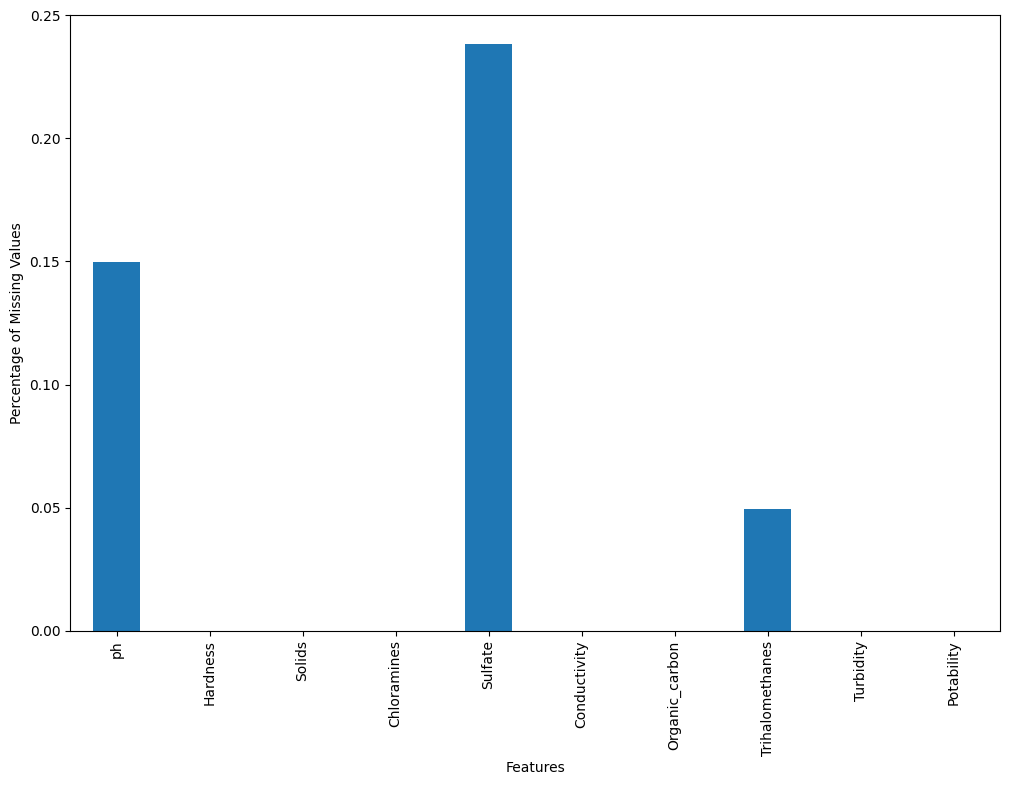

In [508]:
data.isnull().mean().plot.bar(figsize=(12,8))
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")

## Handling Missing Values in the 'ph' Column

### Code Description:
- **`data['ph'].fillna(data['ph'].mean(), inplace=True)`**:
  - This line of code fills missing values in the `ph` column with the mean value of the column.
  - **`data['ph'].mean()`** calculates the mean of the `ph` column, ignoring the `NaN` values.
  - **`fillna()`** replaces any missing values (`NaN`) in the column with the computed mean value.
  - The `inplace=True` argument modifies the original DataFrame without creating a new one.




In [509]:

data['ph'].fillna(data['ph'].mean(), inplace=True)


## Imputing Missing Values in the 'Sulfate' Column Using KNN

### Code Description:
- **`imputer = KNNImputer(n_neighbors=5)`**:
  - This creates an instance of the `KNNImputer` class from scikit-learn, which is used to impute missing values based on the k-nearest neighbors algorithm.
  - The **`n_neighbors=5`** argument specifies that the imputer will use the 5 nearest neighbors to predict the missing values in the dataset.

- **`data[['Sulfate']] = imputer.fit_transform(data[['Sulfate']])`**:
  - This applies the KNN imputer to the `Sulfate` column in the dataset. 
  - The **`fit_transform()`** method first learns the relationships between the features in the dataset (based on the `k` nearest neighbors) and then imputes the missing values in the `Sulfate` column.
  - The imputed values are directly assigned back to the `Sulfate` column.




In [510]:

imputer = KNNImputer(n_neighbors=5)
data[['Sulfate']] = imputer.fit_transform(data[['Sulfate']])


## Imputing Missing Values in the 'Trihalomethanes' Column with the Mean

### Code Description:
- **`data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace=True)`**:
  - This line of code fills missing values in the `Trihalomethanes` column with the mean value of that column.
  - **`data['Trihalomethanes'].mean()`** calculates the mean (average) of the `Trihalomethanes` column, excluding any `NaN` values.
  - **`fillna()`** replaces all `NaN` values in the `Trihalomethanes` column with the calculated mean value.
  - The **`inplace=True`** argument modifies the original DataFrame directly without needing to assign it to a new variable.


In [511]:
# Mean Imputation
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace=True)


In [512]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [513]:
# Save to a CSV file
data.to_csv('cleaned_water_data.csv', index=False)


## Scaling Features Using StandardScaler

### Code Description:
- **`scaler = StandardScaler()`**:
  - This line initializes a `StandardScaler` object from scikit-learn, which standardizes features by removing the mean and scaling to unit variance.
  - The `StandardScaler` is useful for algorithms that are sensitive to the scale of the data, such as Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and Logistic Regression.

- **`scaled_features = scaler.fit_transform(data.drop('Potability', axis=1))`**:
  - **`data.drop('Potability', axis=1)`** removes the `Potability` column (the target variable) from the dataset, as it should not be scaled along with the features.
  - **`scaler.fit_transform()`** first computes the mean and standard deviation of each feature and then scales each feature by subtracting the mean and dividing by the standard deviation.

- **`data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])`**:
  - The scaled features are converted into a new DataFrame, `data_scaled`, where the columns correspond to the original feature names (excluding the `Potability` column).
  
- **`data_scaled['Potability'] = data['Potability']`**:
  - The target variable, `Potability`, is added back to the scaled dataset to ensure it is included in the final dataset for model training.

### Insights:
- Scaling is crucial for many machine learning models that are sensitive to the magnitude of features.
- It’s important to apply the scaler only on training data and then use the same parameters to scale test data to avoid data leakage.


In [514]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Potability', axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_scaled['Potability'] = data['Potability']

In [515]:
print(data_scaled['Potability'].isnull().sum())

0


In [516]:
data_scaled = data_scaled.dropna(subset=['Potability'])

In [517]:
features  = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']


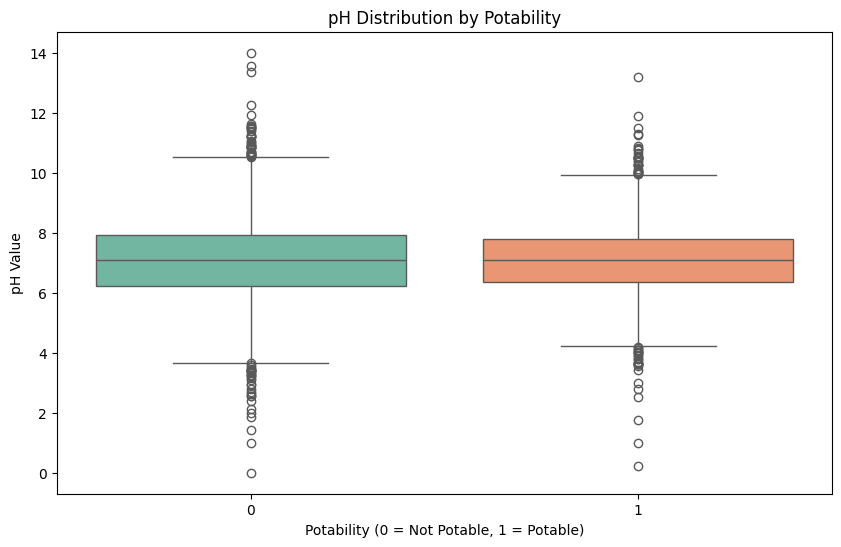

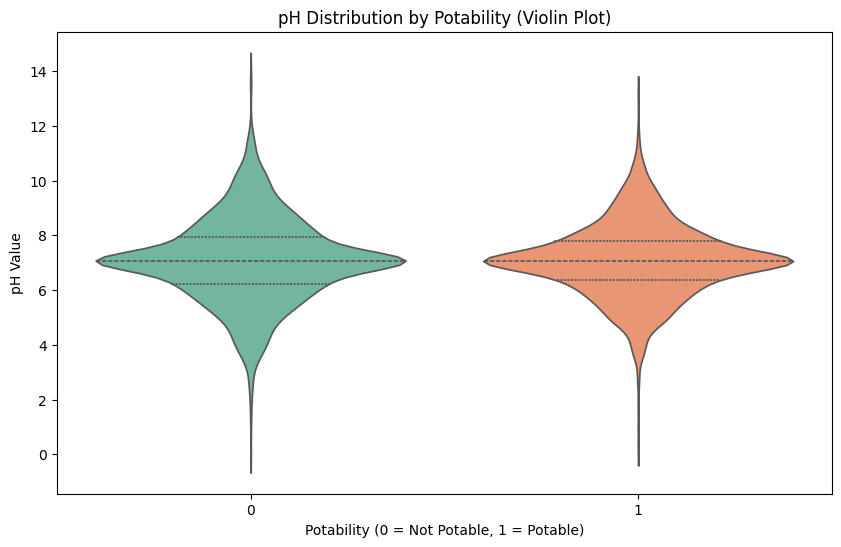

In [518]:
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='Potability', y='ph', data=data, palette="Set2")
plt.title('pH Distribution by Potability')
plt.xlabel('Potability (0 = Not Potable, 1 = Potable)')
plt.ylabel('pH Value')
plt.show()

# Violin plot (optional, for detailed visualization)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Potability', y='ph', data=data, palette="Set2", inner="quartile")
plt.title('pH Distribution by Potability (Violin Plot)')
plt.xlabel('Potability (0 = Not Potable, 1 = Potable)')
plt.ylabel('pH Value')
plt.show()


In [519]:
def remove_outliers_by_group(df, column, group_col):
    new_df = pd.DataFrame()
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group]
        
        # Calculate IQR for the column within the group
        Q1 = group_data[column].quantile(0.25)
        Q3 = group_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Retain data within bounds for this group
        group_filtered = group_data[(group_data[column] >= lower_bound) & (group_data[column] <= upper_bound)]
        new_df = pd.concat([new_df, group_filtered], ignore_index=True)
    
    return new_df

# Remove outliers from 'ph' based on 'Potability'
data = remove_outliers_by_group(data, column='ph', group_col='Potability')

print("New dataset shape after removing pH outliers:", data.shape)


New dataset shape after removing pH outliers: (3152, 10)


## Plotting Distributions of Features

This section visualizes the distribution of each feature in the dataset to assess the underlying patterns and distributions. Histograms are used to show the frequency of values for each feature, with a Kernel Density Estimate (KDE) curve overlaid to provide a smoothed representation of the distribution.


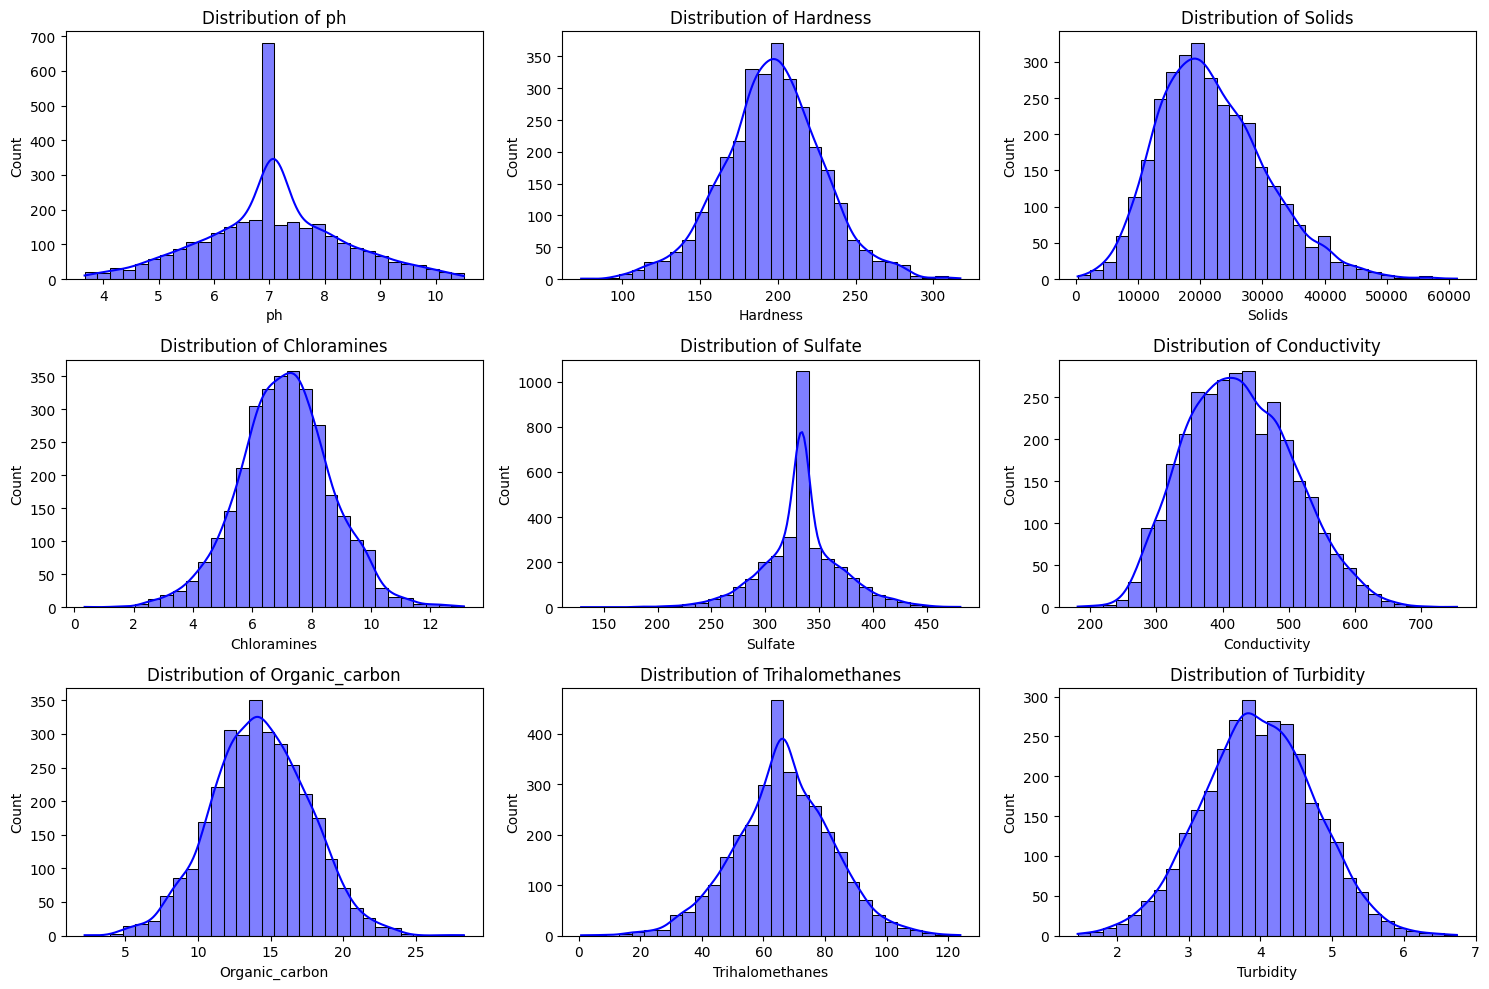

In [520]:
# Plot distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## Plotting Boxplots of Features

Boxplots are used to visualize the spread and distribution of features, and to identify potential outliers. The boxplot shows the median, interquartile range (IQR), and any outliers in the data.




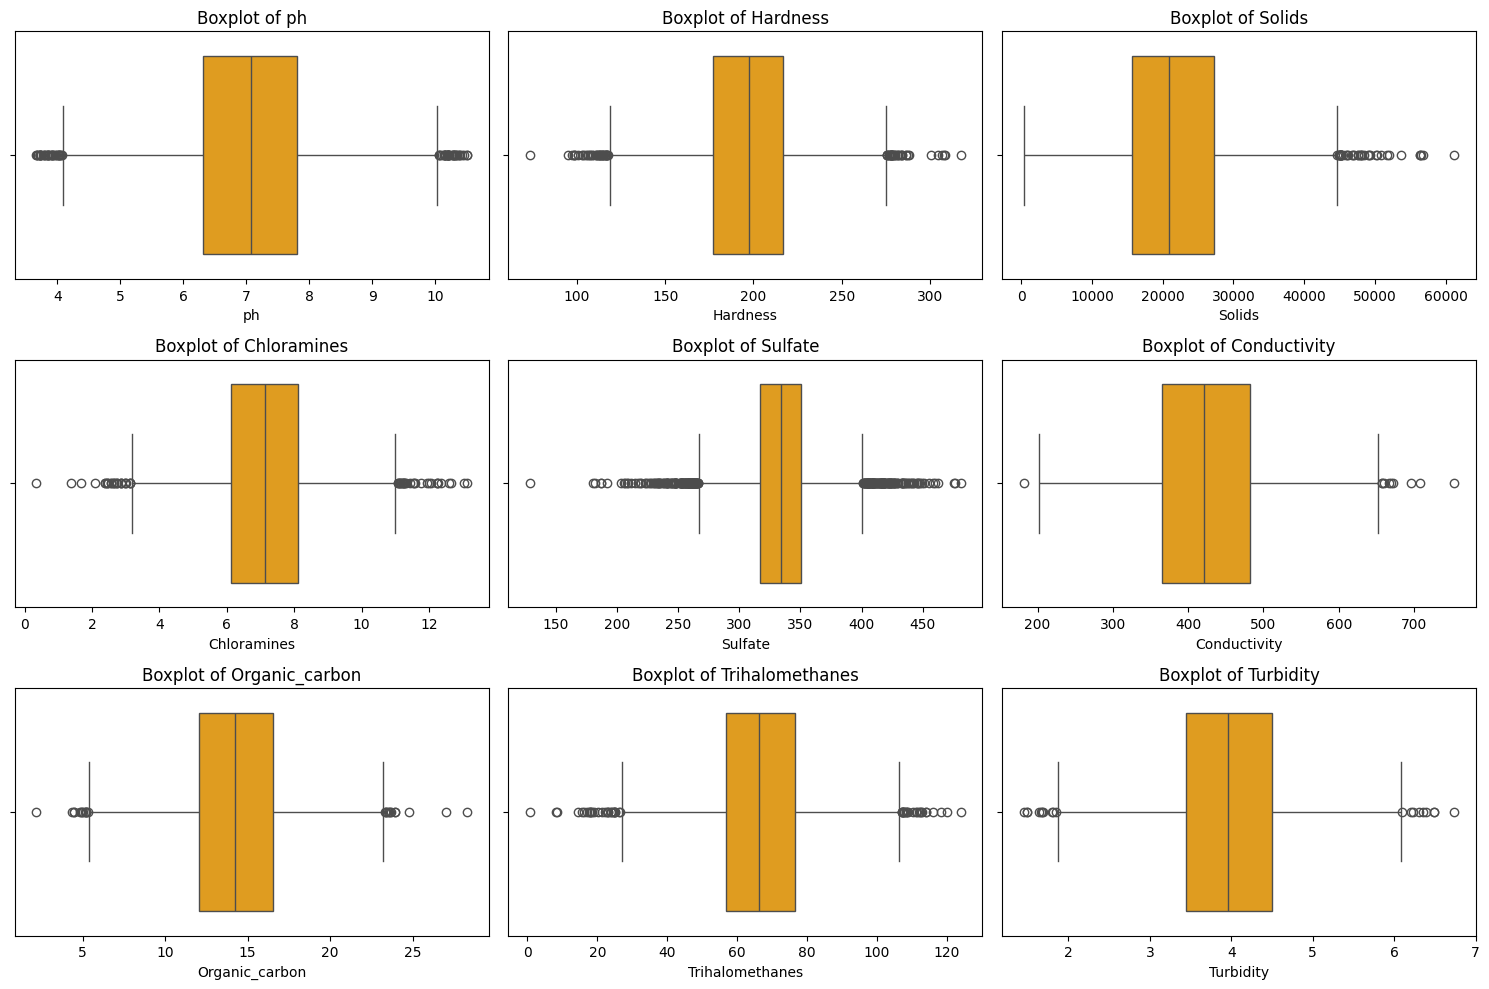

In [521]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[feature], color='orange')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


## Outlier Detection Using IQR Method

Outliers are data points that deviate significantly from the majority of the data and can impact model performance. Using the Interquartile Range (IQR) method, we can detect and count outliers in each column of the dataset.


In [522]:
from collections import defaultdict

outlier_counts = defaultdict(int)

for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:  # Check numeric columns
        Q1 = data[column].quantile(0.25)  # 25th percentile
        Q3 = data[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

# Display the results
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


ph: 71 outliers
Hardness: 72 outliers
Solids: 40 outliers
Chloramines: 55 outliers
Sulfate: 250 outliers
Conductivity: 10 outliers
Organic_carbon: 25 outliers
Trihalomethanes: 52 outliers
Turbidity: 19 outliers
Potability: 0 outliers


In [523]:
# Remove outliers using the IQR method
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:  # Check numeric columns
        Q1 = data[column].quantile(0.25)  # 25th percentile
        Q3 = data[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the dataset to exclude outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Reset the index after removing outliers
data.reset_index(drop=True, inplace=True)

print("Outliers removed. New dataset shape:", data.shape)


Outliers removed. New dataset shape: (2611, 10)


## Generating the Correlation Heatmap

This heatmap visualizes the correlation matrix of the features in the dataset. Correlation measures the strength and direction of a linear relationship between two variables. The heatmap helps to identify highly correlated features, which can inform feature selection and engineering.



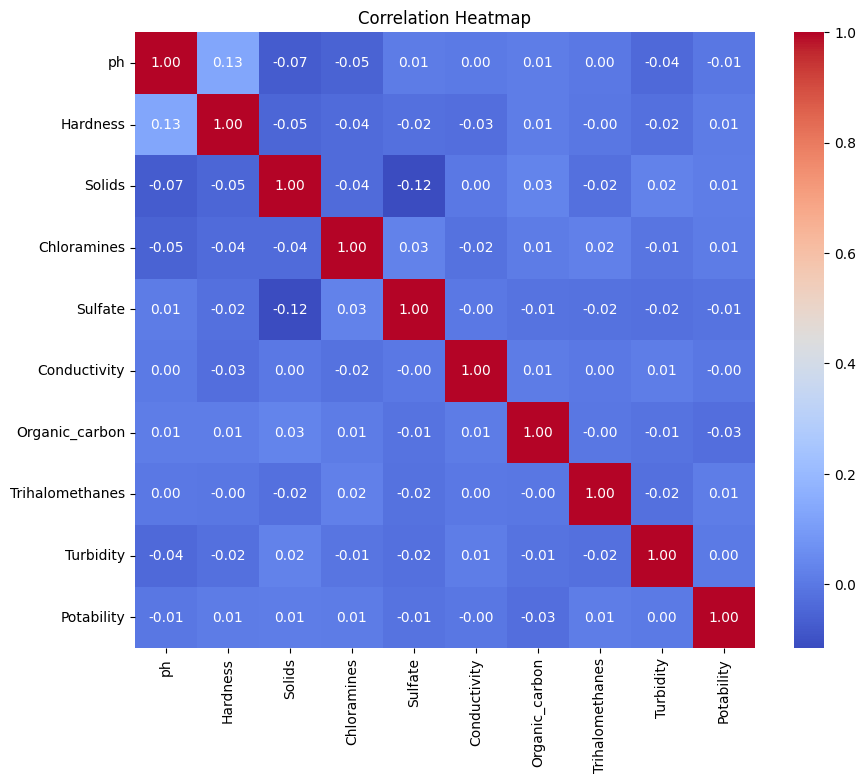

In [524]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Balancing Class Distribution with SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to balance the dataset when there is a class imbalance. By generating synthetic samples for the minority class, SMOTE ensures the model does not become biased towards the majority class.




Original class distribution:
 Potability
0    1629
1     982
Name: count, dtype: int64
New class distribution after SMOTE:
 Potability
0    1629
1    1629
Name: count, dtype: int64


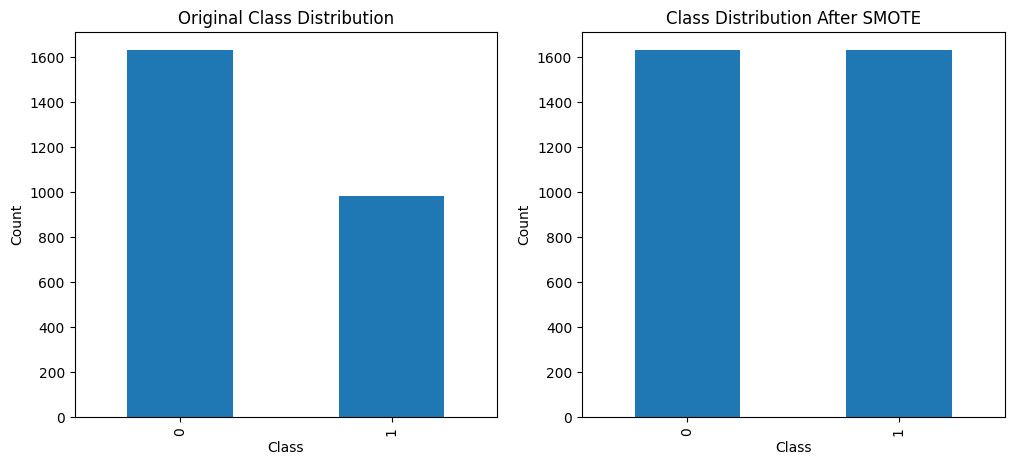

In [525]:
from imblearn.over_sampling import SMOTE

#   Separate features and target variable
X = data.drop(['Potability'], axis=1)  # Replace 'target_column' with your target variable name
y = data['Potability']

#  Check the original class distribution
print("Original class distribution:\n", y.value_counts())

#  Apply SMOTE
smote = SMOTE(sampling_strategy='minority')  # You can adjust the sampling strategy as needed
X_resampled, y_resampled = smote.fit_resample(X, y)

#  Check the new class distribution
print("New class distribution after SMOTE:\n", y_resampled.value_counts())

# Optional: Visualize the class distribution before and after SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
y_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()


## Splitting the Dataset into Training and Testing Sets

The dataset is split into training and testing sets to evaluate the performance of the machine learning model. The training set is used to train the model, while the testing set is used to evaluate its generalization performance on unseen data.



In [526]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Model Definition and Evaluation with Cross-Validation

This section defines a set of machine learning models and evaluates their performance using cross-validation. Cross-validation splits the training data into multiple folds, training and testing the model on each fold to provide a more robust evaluation of its performance.

- **Random Forest**: A versatile ensemble method known for handling both classification and regression tasks effectively, often robust to overfitting.
- **SVC**: A support vector machine classifier, effective for high-dimensional spaces and often used with scaled data.
- **Decision Tree**: A simple yet interpretable model, but prone to overfitting on small datasets.
- **KNN**: A distance-based classifier, sensitive to feature scaling, that performs well on smaller datasets.
- **XGBoost**: A high-performance gradient boosting method that is often a strong choice for structured data.



In [527]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200,random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f}")

Random Forest: 0.6899
SVC: 0.5050
Decision Tree: 0.5944
KNN: 0.5779
XGBoost: 0.6523


## Hyperparameter Tuning Using GridSearchCV

Hyperparameter tuning is conducted to optimize the performance of the Random Forest model by searching for the best combination of hyperparameters. GridSearchCV performs an exhaustive search over the specified parameter grid using cross-validation.


In [528]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 20, 'n_estimators': 200}


In [529]:
best_model

RandomForestClassifier(max_depth=20, n_estimators=200)

## Model Evaluation and Performance Metrics

After training and hyperparameter tuning, the model is evaluated on the test set to assess its performance using a variety of metrics and visualizations.

### Purpose:
1. **Accuracy**: Measures the proportion of correctly predicted instances out of the total.
2. **Precision**: Indicates the proportion of positive predictions that are actually correct, focusing on minimizing false positives.
3. **Recall**: Also known as sensitivity, it measures the proportion of actual positives that were correctly predicted, focusing on minimizing false negatives.
4. **F1 Score**: The harmonic mean of precision and recall, balancing the two metrics for imbalanced datasets.
5. **Confusion Matrix**: Provides a detailed view of true positives, true negatives, false positives, and false negatives.
6. **ROC Curve and AUC**: Illustrates the trade-off between true positive rate and false positive rate across different thresholds and quantifies this performance with the Area Under the Curve (AUC).

### Key Components:
- **Metric Calculations**:
  - **`accuracy_score`**: Proportion of correct predictions.
  - **`precision_score`**: Precision of the positive class.
  - **`recall_score`**: Recall of the positive class.
  - **`f1_score`**: Overall balance between precision and recall.


Accuracy: 0.6855828220858896
Precision: 0.6513761467889908
Recall: 0.7006578947368421
F1 Score: 0.6751188589540412


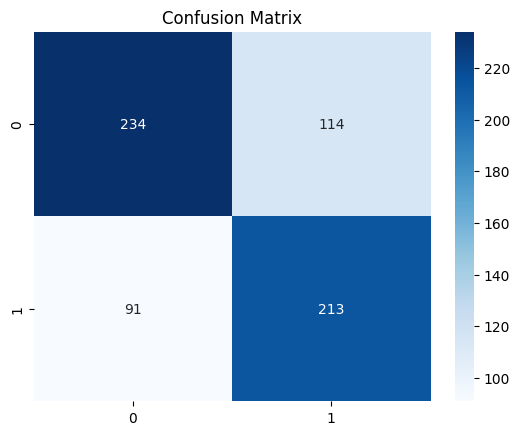

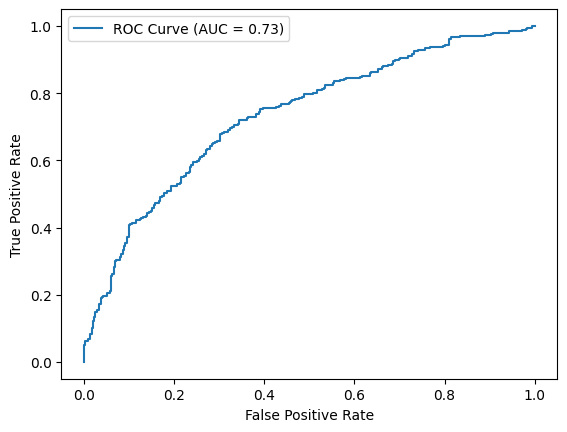

In [530]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Feature Importance Analysis

Feature importance analysis helps identify which features contribute the most to the model's predictions. This is especially useful for tree-based models, such as Random Forest, which can quantify the importance of each feature during training.



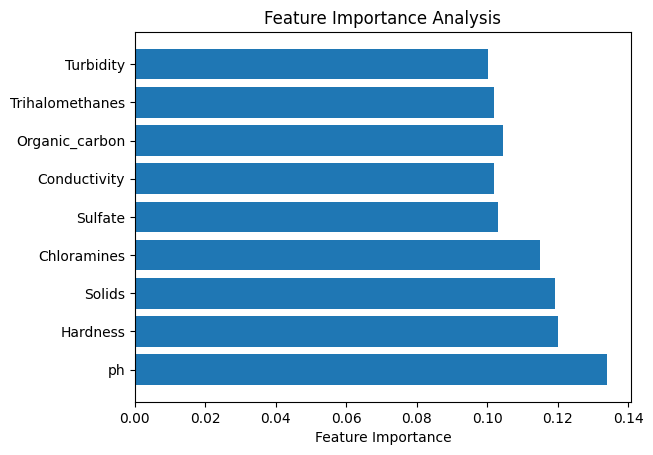

In [531]:
importances = best_model.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()


In [533]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
# Assuming best_model is your trained model
joblib.dump(best_model, 'water_potability_model.pkl')



['water_potability_model.pkl']